# Reducción de dimensión: Análisis Discriminante de Fisher

### Julián D. Arias Londoño

Profesor Asociado  
Departamento de Ingeniería de Sistemas  
Universidad de Antioquia, Medellín, Colombia  
julian.ariasl@udea.edu.co

In [5]:
%matplotlib inline

Aunque PCA encuentra componentes que son útiles para representar la variabilidad en los datos, no existe ninguna razón para asumir que dichas componentes deben ser útiles para discriminar entre conjuntos de datos en diferentes clases.


<img src="./Images/PCA3.png" alt="PCA3" width="600"/>

Mientras PCA busca direcciones de proyección que son eficientes para representar los datos, el <b>análisis discriminante</b>
busca direcciones que son eficientes para discriminación, es decir que permiten una mejor separación de las clases en el espacio de menor dimensión.

<img src="./Images/FDA1.png" alt="FDA" width="600"/> Imágen tomada de [1].

Supongamos que tenemos un problema de clasificación de 2 clases, cada muestra ${\bf{x}}_i$ es $d$-dimensional.
<li> $n_1$ muestras clase 1 </li>
<li> $n_2$ muestras clase 2 </li>

Consideremos la proyección de un punto (muestra) con respecto una dirección representada por un vector unitario ${\bf{v}}$

<img src="./Images/FDA2.png" alt="FDA2" width="300"/>

El escalar ${\bf{v}}^{T}{\bf{x}}_i$ corresponde a la distancia de la proyección de ${\bf{x}}_i$ desde el origen.

¿Cómo medir la separación de las proyecciones de diferentes clases?


<li> Sea $\widetilde{\mu}_1$ y $\widetilde{\mu}_2$ las medias de las proyecciones de las clases 1 y 2 respectivamente. </li>
<li> Sea $\mu_1$ y $\mu_2$ las medias de las clases 1 y 2 en el espacio original. </li>

Una buena medida de separación entre clases podría ser: $|\widetilde{\mu}_1 - \widetilde{\mu}_2|$.

$$
\widetilde{\mu}_1 = \frac{1}{n_1} \sum_{{\bf{x}}_i \in C_1}^{n_1}{\bf{v}}^{T}{\bf{x}}_i =  {\bf{v}}^{T} \left( \frac{1}{n_1} \sum_{{\bf{x}}_i \in C_1}^{n_1}{\bf{x}}_i \right) = {\bf{v}}^{T}\mu_1
$$

de manera similar $\widetilde{\mu}_2 = {\bf{v}}^{T}\mu_2$

¿Que tan buena es $|\widetilde{\mu}_1 - \widetilde{\mu}_2|$ como medida de separación?


¿Entre mayor sea $|\widetilde{\mu}_1 - \widetilde{\mu}_2|$ mejor será la separación esperada?

<img src="./Images/FDA3.png" alt="FDA3" width="300"/>

En la figura anterior el eje vertical es una mejor dirección que el eje horizontal para proyectar los datos, teniendo en cuenta la separabilidad entre clases. Sin embargo $|\hat{\mu}_1 - \hat{\mu}_2|>|\widetilde{\mu}_1 - \widetilde{\mu}_2|$. El problema con la medida anterior es que no considera la varianza de las clases.

Es necesario entonces normalizar  $|\widetilde{\mu}_1 - \widetilde{\mu}_2|$ con respecto a un factor que sea proporcional a la varianza.

Definamos entonces la dispersión ${\bf{S}}$ de un conjunto de muestras como la varianza multiplicada por $n$, es decir:

$${\bf{S}} = \sum_{i=1}^{n} ({\bf{x}}_i - \mu)^{2}$$

La solución proporcionada por el análisis discriminante de Fisher es entonces normalizar la distancia entre las medias por la dispersión.

Sea ${\bf{y}}_i = {\bf{v}}^{T}{\bf{x}}_i$, es decir, ${\bf{y}}_i$'s son las muestras proyectadas.

La dispersión de las muestras proyectadas de la clase 1 es

$$\widetilde{{\bf{S}}}_{1}^{2} = \sum_{{\bf{y}}_i \in C_1} ({\bf{y}}_i - \widetilde{\mu}_1)^{2}$$

La dispersión de las muestras proyectadas de la clase 2 es

$$\widetilde{{\bf{S}}}_{2}^{2} = \sum_{{\bf{y}}_i \in C_2} ({\bf{y}}_i - \widetilde{\mu}_2)^{2}$$

Es necesario normalizar con respecto a ambas dispersiones, por lo tanto el análisis discriminante de Fisher proyecta los datos en la dirección ${\bf{v}}$ que maximiza el criterio:

$$J({\bf{v}}) = \frac{(\widetilde{\mu}_1 - \widetilde{\mu}_2)^{2}}{\widetilde{{\bf{S}}}_{1}^{2} + \widetilde{{\bf{S}}}_{2}^{2}}$$

Si encontramos un vector ${\bf{v}}$ que haga a $J({\bf{v}})$ grande, garantizaremos que las clases están bien separadas.

<img src="./Images/Scatter1.png" alt="Scatter1" width="400"/>

Lo que se necesita es entonces expresar $J({\bf{v}})$ en términos de ${\bf{v}}$ y maximizar. Para es necesario definir las matrices de dispersión de las muestras en el espacio original:

$${\bf{S}}_{1} = \sum_{{\bf{x}}_i \in C_1} ({\bf{x}}_i - \mu_1)({\bf{x}}_i - \mu_1)^{T}$$

$${\bf{S}}_{2} = \sum_{{\bf{x}}_i \in C_2} ({\bf{x}}_i - \mu_2)({\bf{x}}_i - \mu_2)^{T}$$

Y definamos la matriz de dispersión \textbf{intra} clase como: ${\bf{S}}_W = {\bf{S}}_1 + {\bf{S}}_2$.

Recordando los resultados sobre la media de las muestras proyectadas, se puede llegar a la conclusión que: $\widetilde{{\bf{S}}}_{1}^{2} = {\bf{v}}^{T}{\bf{S}}_1{\bf{v}}$ y de manera similar para la clase 2, $\widetilde{{\bf{S}}}_{2}^{2} = {\bf{v}}^{T}{\bf{S}}_2{\bf{v}}$

Entonces

$$\widetilde{{\bf{S}}}_{1}^{2} + \widetilde{{\bf{S}}}_{2}^{2} = {\bf{v}}^{T}{\bf{S}}_1{\bf{v}} + {\bf{v}}^{T}{\bf{S}}_2{\bf{v}} = {\bf{v}}^{T}{\bf{S}}_W{\bf{v}}$$

Se define la matriz de dispersión \textbf{entre} clases como:

$${\bf{S}}_B = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^{T}$$

la cual mide la separación entre las medias de dos clases (antes de la proyección). Utilizando nuevamente la definición de las medias proyectadas desarrollada antes es posible obtener:

$$(\widetilde{\mu}_1 - \widetilde{\mu}_2)^{2} = {\bf{v}}^{T}{\bf{S}}_B{\bf{v}}$$

Por consiguiente el criterio $J({\bf{v}})$ se puede expresar como:

$$ J({\bf{v}}) = \frac{(\widetilde{\mu}_1 - \widetilde{\mu}_2)^{2}}{\widetilde{{\bf{S}}}_{1}^{2} + \widetilde{{\bf{S}}}_{2}^{2}} = \frac{{\bf{v}}^{T}{\bf{S}}_B{\bf{v}}}{{\bf{v}}^{T}{\bf{S}}_W{\bf{v}}}$$

Para minimizar derivamos $J({\bf{v}})$ con respecto a ${\bf{v}}$ e igualamos a cero. Después de algunas operaciones matriciales se llega a:

$${\bf{S}}_W^{-1} {\bf{S}}_B {\bf{v}} = \lambda {\bf{v}}$$

Que corresponde nuevamente a un problema de cálculo de valores propios pero está vez de la matriz ${\bf{S}}_W^{-1} {\bf{S}}_B$. Es posible también encontrar que para un caso bi-clase, la proyección que maximiza el criterio de Fisher corresponde al vector ${\bf{v}} = {\bf{S}}_W^{-1} (\mu_1 - \mu_2)$.

El análisis discriminante de Fisher se puede generalizar para múltiples clases, en cuyo caso el criterio a optimizar es:

$$J({\bf{V}}) = \frac{\det\left( {\bf{V}}^{T}{\bf{S}}_B{\bf{V}}\right) }{\det\left( {\bf{V}}^{T}{\bf{S}}_W{\bf{V}}\right) }$$

donde ${\bf{V}}$ es llamada la matriz de proyección.

<img src="./Images/FDA4.png" alt="FDA4" width="600"/> Image taken from [1].

### Ejemplo:

Veamos un ejemplo usando la base de datos iris:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
import matplotlib.pyplot as plt

#### Proyecciones usando PCA

In [3]:
from sklearn.decomposition import PCA
pca = PCA(1) # only keep one dimension!
X_E = pca.fit_transform(X)

En la figura siguiente, las líneas rojas representan las direcciones de mayor varianza de acuerdo con el criterio de PCA, para las diferentes combinaciones de variables de entrada.

<Figure size 576x576 with 0 Axes>

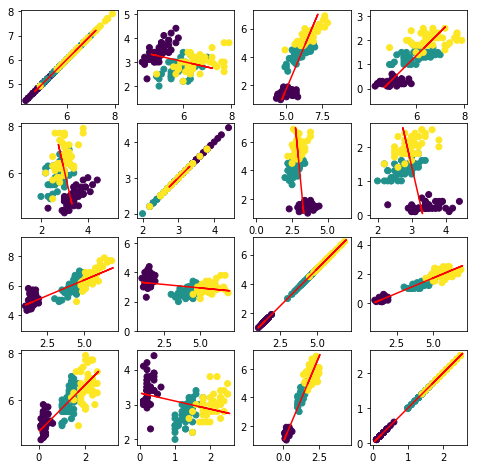

<Figure size 576x576 with 0 Axes>

In [18]:
X_reconstructed = pca.inverse_transform(X_E)
plt.figure(figsize=(8,8))
for i in xrange(4):
    for j in xrange(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(X[:,i], X[:,j],c=y)
        plt.plot(X_reconstructed[:,i], X_reconstructed[:,j],c='r')
        plt.axis('equal')
plt.figure(figsize=(8,8))
        

La figura siguiente muestra los datos proyectados en las direcciones de mayor varianza.

<Figure size 576x576 with 0 Axes>

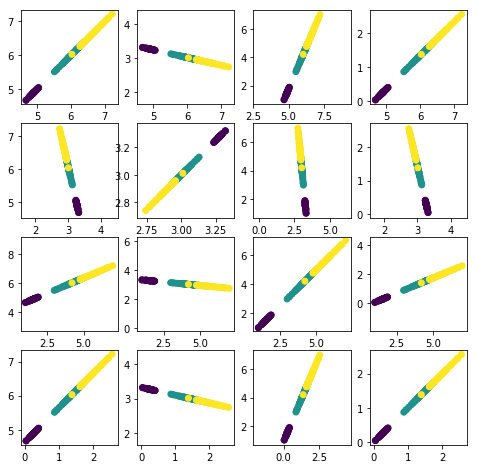

<Figure size 576x576 with 0 Axes>

In [5]:
plt.figure(figsize=(8,8))
for i in xrange(4):
    for j in xrange(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(X_reconstructed[:,i], X_reconstructed[:,j],c=y)
        plt.axis('equal')       
plt.figure(figsize=(8,8))       

#### Proyecciones usando LDA

En las figuras siguientes se muestran el espacio transformado por LDA y las proyecciones de mayor discriminación (líneas rojas) de acuerdo con el criterio de LDA, para las diferentes combinaciones de variables de entrada.

<Figure size 576x576 with 0 Axes>

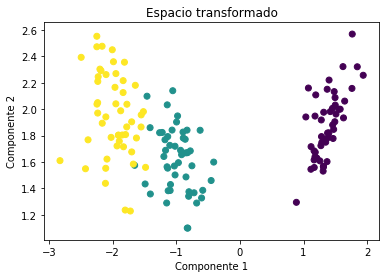

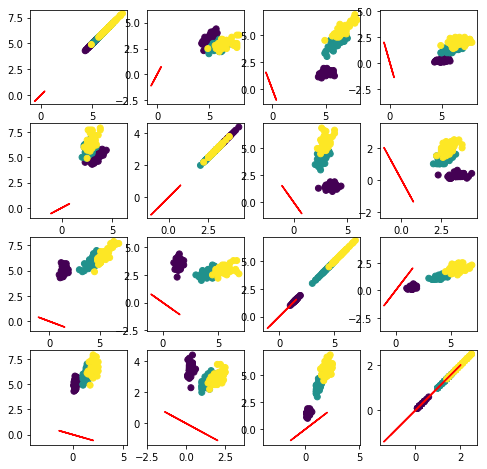

<Figure size 576x576 with 0 Axes>

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy.linalg import inv

clf = LinearDiscriminantAnalysis(solver='eigen')
X_t = clf.fit_transform(X,y)
u = np.dot(np.dot(inv(np.dot(X.T, X)),X.T),X_t)
X_reconstructed = np.dot(X_t[:,0].reshape(X_t.shape[0],1),u[:,0].T.reshape(1,4))
plt.figure()
plt.scatter(X_t[:,0],X_t[:,1],c=y)
plt.title('Espacio transformado')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.figure(figsize=(8,8))
for i in xrange(4):
    for j in xrange(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(X[:,i], X[:,j],c=y)
        plt.plot(X_reconstructed[:,i], X_reconstructed[:,j],c='r')
        plt.axis('equal')       
plt.figure(figsize=(8,8))  
#print u

La figura siguiente muestra los datos proyectados en las direcciones de mayor discriminación.

<Figure size 576x576 with 0 Axes>

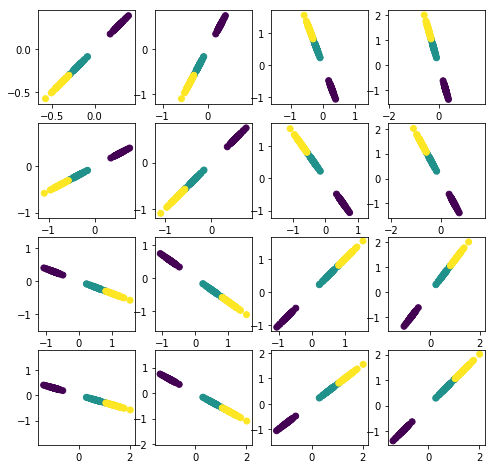

<Figure size 576x576 with 0 Axes>

In [11]:
plt.figure(figsize=(8,8))
for i in xrange(4):
    for j in xrange(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(X_reconstructed[:,i], X_reconstructed[:,j],c=y)
        plt.axis('equal')       
plt.figure(figsize=(8,8))  

##### Bibliografía